In [53]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [54]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [55]:
NUM_CLASSES = 6

# Dataset reading

In [56]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [57]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [60]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_8 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [62]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [63]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 10s 324ms/step - accuracy: 0.1406 - loss: 1.9495
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2001 - loss: 1.8578 - val_accuracy: 0.2821 - val_loss: 1.6772
Epoch 2/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2656 - loss: 1.7077
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2881 - loss: 1.6810 - val_accuracy: 0.4261 - val_loss: 1.5750
Epoch 3/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3516 - loss: 1.6574
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3628 - loss: 1.5914 - val_accuracy: 0.4985 - val_loss: 1.4693
Epoch 4/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3906 - loss: 1.4951
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras

In [64]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9455 - loss: 0.2903


In [65]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [66]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.36528054 0.15872593 0.00779646 0.05501134 0.08746433 0.32572132]
0


# Confusion matrix

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


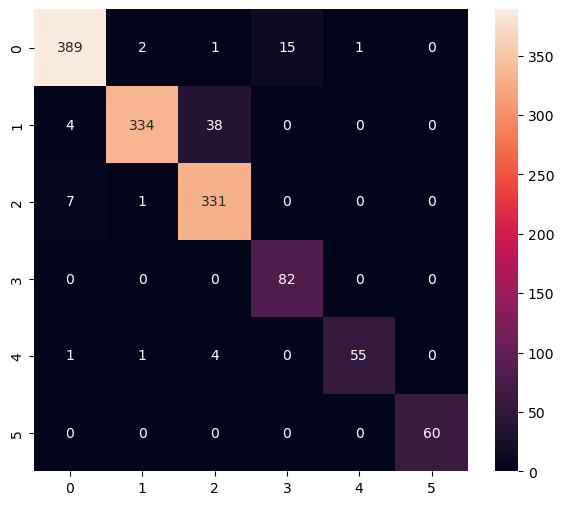

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       408
           1       0.99      0.89      0.94       376
           2       0.89      0.98      0.93       339
           3       0.85      1.00      0.92        82
           4       0.98      0.90      0.94        61
           5       1.00      1.00      1.00        60

    accuracy                           0.94      1326
   macro avg       0.95      0.95      0.95      1326
weighted avg       0.95      0.94      0.94      1326



In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [68]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [69]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/qc/bt_wrfqs213dpd09ktc1ths40000gn/T/tmpgunp3g0v/assets


INFO:tensorflow:Assets written to: /var/folders/qc/bt_wrfqs213dpd09ktc1ths40000gn/T/tmpgunp3g0v/assets


Saved artifact at '/var/folders/qc/bt_wrfqs213dpd09ktc1ths40000gn/T/tmpgunp3g0v'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  5548161744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5548149264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5548155024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5548153872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5548162896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5548154064: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1732980418.449307  557506 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1732980418.449534  557506 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


6660

# Inference test

In [70]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [71]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [72]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [73]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 28 μs, sys: 13 μs, total: 41 μs
Wall time: 43.2 μs


In [74]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.36528063 0.15872598 0.00779647 0.05501133 0.08746434 0.32572132]
0
